## Generate WordClouds and Statistics for Tag Emotions

This notebook generated wordclouds and computes some general statistics for unique tag strings that were predicted to express a given emotion.

In [1]:
import mysql.connector
import typing as T
from mysql.connector import errorcode
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import numpy as np

from utils import get_db_connection, execute_sql
from wordcloud_helpers import get_wordcloud, compute_wordclouds

# Downloading NLTK stopwords only needs to be done once
# import nltk
# nltk.download('stopwords')

STOP_WORDS = stopwords.words('english')

In [2]:
GET_LABELS = "SELECT name, score, emotion FROM Tag;"

df = pd.read_sql(GET_LABELS, get_db_connection())

/tmp/ipykernel_3232237/2378121582.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(GET_LABELS, get_db_connection())


In [4]:
df.sample(5)

,name,score,emotion
7650,overly simplified,0.706475,neutral
48765,HAUNTED HOUSE,0.763098,neutral
68435,Brundlefly,0.872541,neutral
22161,PG-13:some sexuality,0.671113,neutral
39039,norfolk,0.922491,neutral


In [5]:
df.emotion.value_counts()

neutral     56175
joy          4046
sadness      3838
disgust      3806
anger        2595
fear         2538
surprise     1712
Name: emotion, dtype: int64

In [6]:
# Minor text cleaning for creating wordclouds
df["clean_name"] = df["name"].str.casefold()
df["clean_name"] = df["clean_name"].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOP_WORDS)]))
df.sample(5)

,name,score,emotion,clean_name
41398,korean war veteran,0.827172,neutral,korean war veteran
73848,Volkswagen Beetle,0.749520,neutral,volkswagen beetle
72024,thought provaking,0.862669,neutral,thought provaking
66257,Paul Fierlinger,0.909069,neutral,paul fierlinger
22865,sense of taste,0.365460,neutral,sense taste


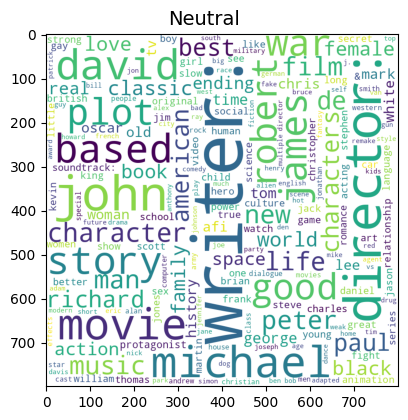

In [19]:
wordcloud = get_wordcloud(df.loc[df["emotion"] == "neutral"])

plt.figure(figsize=(4,4), facecolor=None)
plt.imshow(wordcloud)
plt.suptitle("Neutral", fontsize=14, y=1)
plt.tight_layout(pad=0)
plt.show()

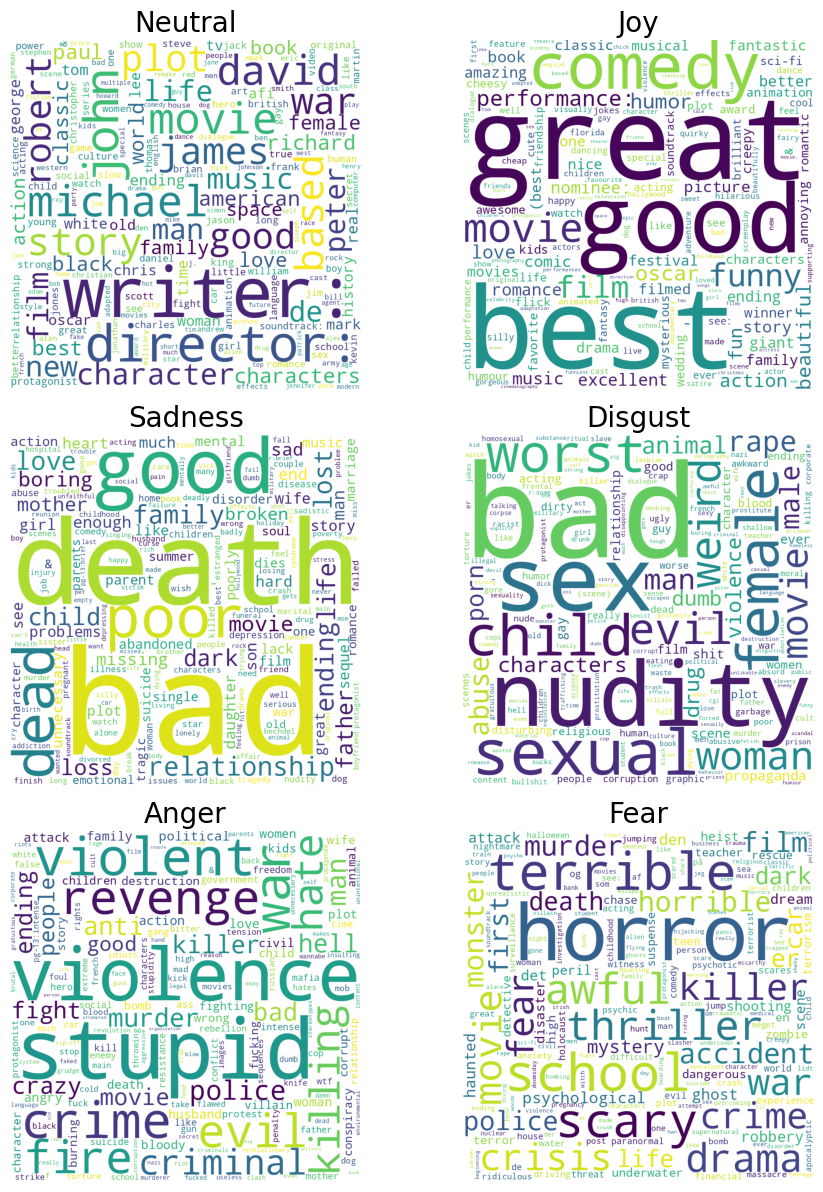

In [8]:
compute_wordclouds(df)

In [9]:
df[["emotion", "score"]].groupby("emotion").mean()

,score
emotion,
anger,0.614832
disgust,0.615616
fear,0.658072
joy,0.677630
neutral,0.735985
sadness,0.644302
surprise,0.564010


In [10]:
df[["emotion", "score"]].groupby("emotion").std()

,score
emotion,
anger,0.198520
disgust,0.189565
fear,0.237443
joy,0.193883
neutral,0.153312
sadness,0.203342
surprise,0.177487


In [11]:
df[["emotion", "score"]].groupby("emotion").max()

,score
emotion,
anger,0.993621
disgust,0.984813
fear,0.994556
joy,0.990852
neutral,0.976205
sadness,0.991065
surprise,0.984219


In [12]:
df[["emotion", "score"]].groupby("emotion").min()

,score
emotion,
anger,0.186174
disgust,0.201867
fear,0.216177
joy,0.240433
neutral,0.201999
sadness,0.215101
surprise,0.210332


In [13]:
# Generate bi-grams
# from nltk import ngrams

# df['ngrams'] = df['name'].str.split().apply(lambda x: list(map(' '.join, ngrams(x, n=2))))
# (df.assign(count=df['ngrams'].str.len())
#    .explode('ngrams')
#    .query('count > 0')
# )